In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_by_day: (365, 3)
data_by_month: (12,)
309948684.0


Text(0, 0.5, 'The number of receipts (2021)')

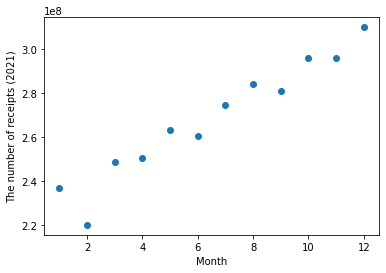

In [175]:
#load the data by day
data = pd.read_csv(r"data_daily.csv").to_numpy()
print('data_by_day:', data.shape)

#plot the data by month
# plt.scatter([i+1 for i in range(len(data[:,0]))], data[:,2])
# plt.xlabel('Days')
# plt.ylabel('The number of receipts')

#convert the data by month
data_mon = np.zeros(shape=(12,))
for i, month in enumerate(data[:,1]):
    data_mon[month-1] += data[i,2]
print('data_by_month:', data_mon.shape)
print(np.amax(data_mon))

#plot the data by month
plt.scatter([i+1 for i in range(len(data_mon))], data_mon)
plt.xlabel('Month')
plt.ylabel('The number of receipts (2021)')

In [86]:
#calculate the cost function
def cal_cost(x,y,a):
    '''
    x = day, (365,)
    y = the number of receipts, (365,)
    a = parameters with bias units, (2,1)
    Returns a cost value
    '''
    
    m = len(y)  # the number of dataset
    
    predictions = np.dot(x,a)  # (m,)
    cost = 1/(2*m) * np.sum(np.square(predictions-y))
    
    return cost

In [108]:
#calculate the gradient_descent
def gradient_descent(x,y,a,learning_rate,iterations):
    '''
    x = day, (365,)
    y = the number of receipts, (365,)
    a = parameters with bias units, (2,1)
    Returns the final a vector and array of cost history over number of iterations
    '''
    
    m = len(y)  # the number of dataset
    
    cost_history = np.zeros(iterations)   # (iterations,)
    a_history = np.zeros((iterations,2))  # (iterations,)
    
    for it in range(iterations):
        
        prediction = np.dot(x,a)
        a = a - (1/m) * learning_rate * ( x.T.dot((prediction - y)))
        a_history[it,:] = a.T
        cost_history[it] = cal_cost(x,y,a)
        
    return cost_history, a_history

In [160]:
#data normalization
data_mon = data_mon/np.amax(data_mon)
#prepare the training data, (predict = a_0 + a_1*month)
month = np.array([i+1 for i in range(len(data_mon))]).reshape((len(data_mon),1))/len(data_mon)
x = np.c_[np.ones((len(data_mon),1)), month]  # month
y = data_mon.reshape((len(data_mon),1))    # predict(the numbe of receipts)
print(x.shape, y.shape)

# parameters (predict(the numbe of receipts) = a_0 + a_1*days)
lr = 0.1
n_iter = 50
a = np.random.rand(2,1)   # a = [a_0, a_1]

cost_history,a_history = gradient_descent(x,y,a,lr,n_iter)
print('a_history: ', a_history[-1])
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

(12, 2) (12, 1)
a_history:  [0.61758661 0.44837576]
Final cost/MSE:  0.001


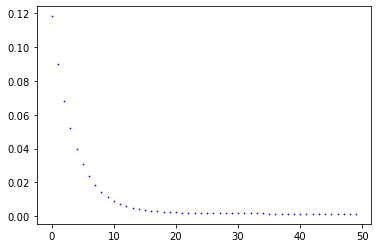

In [161]:
# plot the cost and paramters history
plt.scatter(range(n_iter), cost_history, s=0.5, color='blue')

In [162]:
x

array([[1.        , 0.08333333],
       [1.        , 0.16666667],
       [1.        , 0.25      ],
       [1.        , 0.33333333],
       [1.        , 0.41666667],
       [1.        , 0.5       ],
       [1.        , 0.58333333],
       [1.        , 0.66666667],
       [1.        , 0.75      ],
       [1.        , 0.83333333],
       [1.        , 0.91666667],
       [1.        , 1.        ]])

[2.03001280e+08 2.14582403e+08 2.26163527e+08 2.37744650e+08
 2.49325773e+08 2.60906896e+08 2.72488019e+08 2.84069142e+08
 2.95650265e+08 3.07231388e+08 3.18812511e+08 3.30393635e+08]


Text(0, 0.5, 'The number of receipts (2022)')

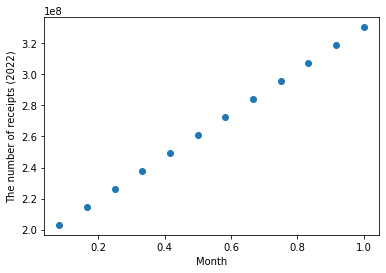

In [174]:
#test the pre-trained paramters by predicting the number of receipts od 2022
#denormalize the data after normalization, 309948684:np.amax(data_mon)
prediction = np.dot(x, a_history[-1]) * 309948684 
print(prediction)

#plot the prediction
plt.scatter(x[:,1], prediction)
plt.xlabel('Month')
plt.ylabel('The number of receipts (2022)')